# Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


In [1]:
from __future__ import division

## Microcircuit Conenctivity

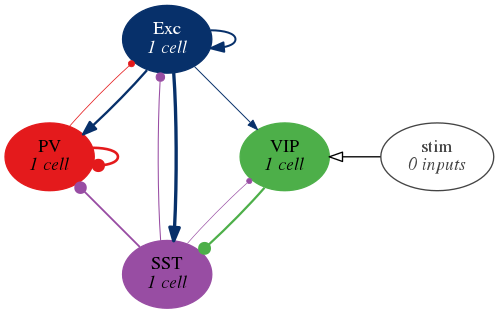

In [2]:
from IPython.display import Image
Image("../NeuroML/Fig1/Fig1a.png")

In [3]:
populations = ['exc', 'pv', 'sst', 'vip']
colours = ['blue', 'red', 'darkorchid', 'green']

## Low Baseline Activity

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=False)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


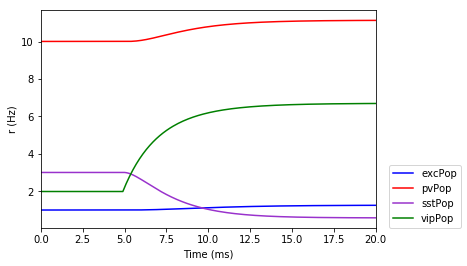

In [5]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in low_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, low_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## High Baseline Activity

In [6]:
high_lems_file='../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml'
high_results = pynml.reload_saved_data(high_lems_file)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


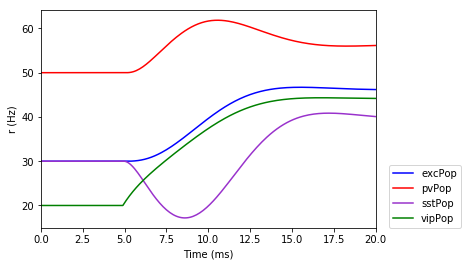

In [7]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(high_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in high_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, high_results[pop + '[0]/r'], label=pop, color=colours[population_idx])

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_exc.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_exc.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_pv.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig2/LEMS_fISim_pv.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig1/LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks

pyNeuroML >>> Reloading data specified i

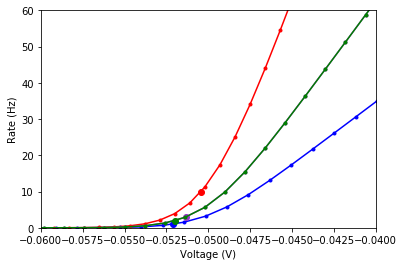

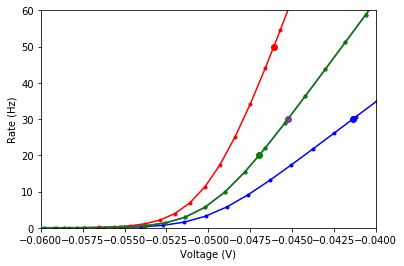

In [8]:
import numpy as np
n_units = 20
baselines = ['low', 'high']

r = {}
v = {}
for baseline in baselines:
    plt.figure()
    for population_idx, population in enumerate(populations):
        lems_file = '../NeuroML/Fig2/LEMS_fISim_%s.xml' %population
        # Run simulation
        # cleanup: remove the .dat file after loading them
        results = pynml.reload_saved_data(lems_file)
        # get the last values of the simulation and plot the fI Curve

        r[population] = np.zeros((n_units))
        v[population] = np.zeros((n_units))
        for unit in range(n_units):
            pop_unit_r = '%sPop[%d]/r' %(population, unit)
            pop_unit_V = '%sPop[%d]/V' %(population, unit)
            r[population][unit] = results[pop_unit_r][-1]
            v[population][unit] = results[pop_unit_V][-1]

        plt.plot(v[population], r[population], marker='.', color=colours[population_idx])

        # load the low_baseline results and plot them on the fI curve
        baseline_lems = '../NeuroML/Fig1/LEMS_RateBased_%s_baseline.xml' %baseline
        results_baseline = pynml.reload_saved_data(baseline_lems)
        population_v = '%sPop[0]/V' %population
        population_r = '%sPop[0]/r' %population
        # Note: I am taking the first time point as at time point 0 the membrane voltage has not yet reached the baseline
        #  activity steady-state
        plt.plot(results_baseline[population_v][1], results_baseline[population_r][1], 'o', color=colours[population_idx])
        print('')

        plt.xlabel('Voltage (V)')
        plt.ylabel('Rate (Hz)')
        plt.xlim(-.060, -.040)
        plt.ylim(0, 60)
        plot_name = 'fI_%s_baseline.png' %baseline

## Random Network Model

In [9]:
# General settings for the Population analysis
n_pops = [800, 100, 50, 50]
units = ['exc', 'pv', 'sst', 'vip']

# Load simulation
lems_low_file = '../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml'
results_low = pynml.reload_saved_data(lems_low_file, 
                      base_dir = '.',
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False,
                      remove_dat_files_after_load = False) 

lems_high_file = '../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml'
results_high = pynml.reload_saved_data(lems_high_file,
                      base_dir = '.',
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False,
                      remove_dat_files_after_load = False) 

# Settings for the filled plot
# Define colours for the filled in area
lcolours = ['#588ef3', '#f35858', '#bd58f3', '#2f940a']
def plt_filled_std(ax, data, t, color):
    est = np.mean(data, axis=1)
    sd = np.std(data, axis=1)
    # calculate upper and lower bounds of the plot
    cis = (est - sd, est + sd)
    # plot filled area
    ax.fill_between(t, cis[0],cis[1],alpha=0.2, color=color)
    # plot mean
    ax.plot(t, est, color=color, linewidth=2)
    ax.margins(x=0)


pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml (/Users/jessica/Dropbox/GSoC/delMolino/NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/delMolino/notebooks


### Low Baseline Activity

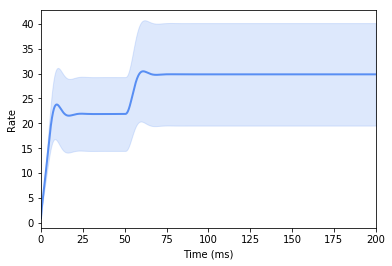

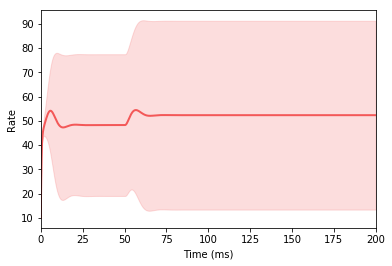

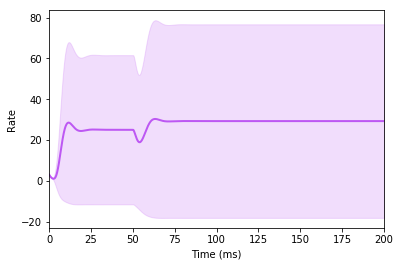

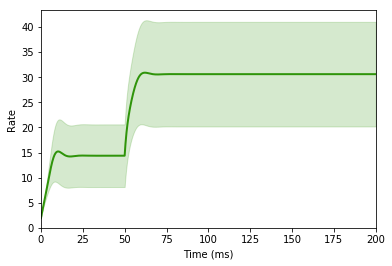

In [10]:
# Iterate over all 4 popualtions, save the results and plot the mean and standard deviation acrate activity
# for each population
for pop_idx, pop in enumerate(units):
    fig, ax = plt.subplots(1)
    plt.xlabel('Time (ms)')
    plt.ylabel('Rate')
    # calulate time in ms
    t = np.multiply(results_low['t'], 1000)
    pop_data = np.zeros((len(results_low['t']), n_pops[pop_idx]))
    
    for n_pop in range(n_pops[pop_idx]):
        pop_unit =  '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        pop_data[:, n_pop] = results_low[pop_unit]
    plt_filled_std(ax, pop_data, t, lcolours[pop_idx])

### High Baseline Activity

In [11]:
len(results_high['t'])

2001

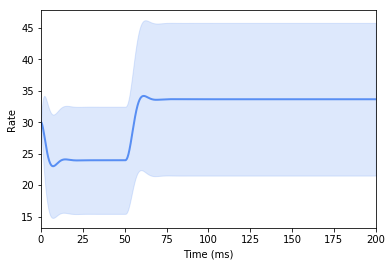

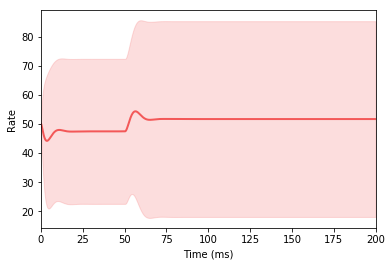

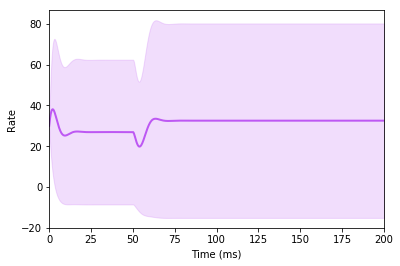

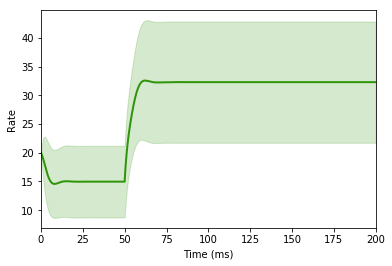

In [12]:
# Iterate over all 4 popualtions, save the results and plot the mean and standard deviation acrate activity
# for each population
for pop_idx, pop in enumerate(units):
    fig, ax = plt.subplots(1)
    plt.xlabel('Time (ms)')
    plt.ylabel('Rate')
    pop_data = np.zeros((len(results_high['t']), n_pops[pop_idx]))
    t = np.multiply(results_high['t'], 1000)
    
    for n_pop in range(n_pops[pop_idx]):
        pop_unit =  '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        pop_data[:, n_pop] = results_high[pop_unit]
    plt_filled_std(ax, pop_data, t, lcolours[pop_idx])

### Rate Modulation

In [ ]:
for pop_idx, pop in enumerate(units):
    avg_pop_high = 0
    avg_pop_low = 0
    pop_high = []
    pop_low = []
    plt.figure()
    plt.xlabel('Low Baseline (Hz)')
    plt.ylabel('High Baseline (Hz)')
    for n_pop in range(n_pops[pop_idx]):
        pop_unit = '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        # plot rate modulation. Plot the rate after the onset of the modulatory current (at 100ms) minus the baseline
        # rate)
        rate_modulation_low = results_low[pop_unit][101] - results_low[pop_unit][0]
        rate_modulation_high = results_high[pop_unit][101] - results_high[pop_unit][0]
        plt.plot(rate_modulation_low, rate_modulation_high, 'o', color=colours[pop_idx], zorder=1)
        avg_pop_low =+ rate_modulation_low
        avg_pop_high =+ rate_modulation_high
        pop_low.append(rate_modulation_low)
        pop_high.append(rate_modulation_high)
    plt.scatter(np.mean(pop_low), np.mean(pop_high), marker='o', c='w', edgecolors='k', linewidths=2, zorder=2)
    